# Case Study - Cleaning Data in Python

In [2]:
import pandas as pd

## Load data

In [4]:
g1800s = pd.read_csv('data/g1800s.csv')
print(g1800s.shape)
g1800s.head()

(260, 101)


,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


## Exploratory analysis

Whenever you obtain a new dataset, your first task should always be to do some **exploratory analysis** to get a better understanding of the data and diagnose it for any potential issues.

The Gapminder data for the 19th century has been loaded into a DataFrame called `g1800s`. In the IPython Shell, use pandas methods such as `.head()`, `.info()`, and `.describe()`, and DataFrame attributes like `.columns` and `.shape` to explore it.

Use the information that you acquire from your exploratory analysis to choose the true statement from the options provided below.

In [5]:
g1800s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 205.2+ KB


In [6]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


In [7]:
g1800s.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=101)

- No: The DataFrame has 259 rows and 100 columns.
- No: The DataFrame has no missing values encoded as NaN.
- Yes: 100 of the columns are of type float64 and 1 column is of type object.
- No: The DataFrame takes up 203.2+ KB of memory.

This information is provided by the `g1800s.info()`. 'Life expectancy' is the only column in the DataFrame that is not of type float64.

## Visualizing your data

Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

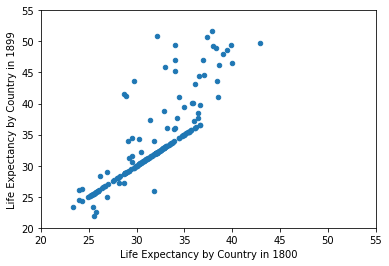

In [8]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show();

As you can see, there are a surprising number of countries that fall on the diagonal line. In fact, examining the DataFrame reveals that the life expectancy for 140 of the 260 countries did not change at all in the 19th century! This is possibly a result of not having access to the data for all the years back then. In this way, visualizing your data can help you uncover insights as well as diagnose it for errors.

## Thinking about the question at hand

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

- 'Life expectancy' is the first column (index 0) of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
- There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [14]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [16]:
# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
# Write an assert statement to test that all the 
# values are valid for the g1800s DataFrame. 
# Use the check_null_or_valid() function placed inside 
# the .apply() method for this. Note that because you're 
# applying it over the entire DataFrame, and not just one column, 
# you'll have to chain the .all() method twice, 
# and remember that you don't have to use () 
# for functions placed inside .apply().
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

## Assembling your data

Here, three DataFrames have been pre-loaded: `g1800s`, `g1900s`, and `g2000s`. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called `gapminder`. This is a row-wise concatenation.

In [17]:
g1900s = pd.read_csv('data/g1900s.csv')
print(g1900s.shape)
g1900s.head()

(260, 101)


,Life expectancy,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,27.19,27.18,27.17,27.16,27.15,27.14,27.12,27.11,27.10,...,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.2
4,Algeria,28.86,28.90,28.94,29.86,24.12,26.70,28.03,27.93,27.84,...,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.0


In [18]:
g2000s = pd.read_csv('data/g2000s.csv')
print(g2000s.shape)
g2000s.head()

(260, 18)


,Life expectancy,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,50.1,50.4,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,74.7,75.1,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,73.3,73.5,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [22]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=0, sort=False)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
gapminder.head()

(780, 218)


,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reshaping your data

Now that you have all the data combined into a single DataFrame, the next step is to **reshape** it into a **tidy data format**.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by **melting** it.

In [23]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

gapminder_melt.head()

,Life expectancy,variable,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


In [24]:
# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


Having the data in this **tidy format** will make subsequent analysis far easier.

## Checking the data types

Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type `object`, year is of type `int64`, and life_expectancy is of type `float64`.

The tidy DataFrame has been pre-loaded as `gapminder`. Explore it in the IPython Shell using the `.info()` method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the `pd.to_numeric()` function to convert it to a numeric data type.

In [25]:
gapminder = gapminder_melt.copy()

In [26]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


In [28]:
import numpy as np

# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year, errors='coerce')

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

In [29]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB
